# import libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder


# import dataset

In [48]:
data=pd.read_csv("C:\\Users\\HP\\Desktop\\salarydata_analysis.csv")
data.head(30)

,work_year,experience_level,employment_type,job_title,salary_in_usd,company_location,company_size
0,2020,Midlevel,Fulltime,Data Scientist,79833,Germany,Large
1,2020,Senior,Fulltime,Machine Learning Scientist,260000,Japan,Small
2,2020,Senior,Fulltime,Big Data Engineer,109024,Great Britain,Medium
3,2020,Midlevel,Fulltime,Product Data Analyst,20000,Honduras,Small
4,2020,Senior,Fulltime,Machine Learning Engineer,150000,United States,Large
5,2020,Entry Level,Fulltime,Data Analyst,72000,United States,Large
6,2020,Senior,Fulltime,Lead Data Scientist,190000,United States,Small
7,2020,Midlevel,Fulltime,Data Scientist,35735,Hungary,Large
8,2020,Midlevel,Fulltime,Business Data Analyst,135000,United States,Large
9,2020,Senior,Fulltime,Lead Data Engineer,125000,New Zealand,Small


# summary statistics

In [10]:
data.describe().round(2)

,work_year,salary_in_usd
count,528.00,528.00
mean,2021.35,105584.39
std,0.70,66792.04
min,2020.00,2859.00
25%,2021.00,58734.25
50%,2021.00,98158.00
75%,2022.00,144000.00
max,2022.00,450000.00


# Salarydata distribution

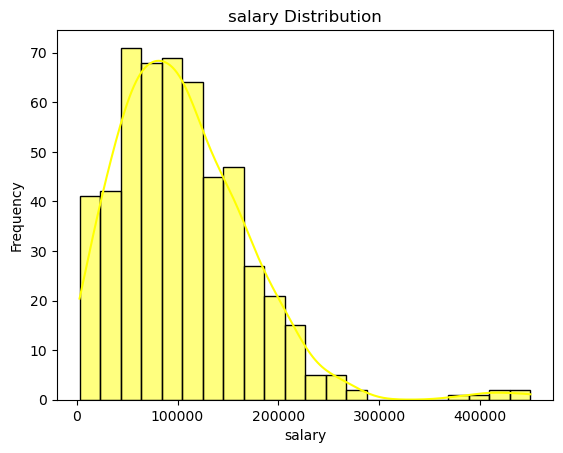

In [18]:
sb.histplot(data["salary_in_usd"],kde=True,color="yellow")
plt.title("salary Distribution")
plt.xlabel("salary")
plt.ylabel("Frequency")
plt.show()

# categorical data analysis

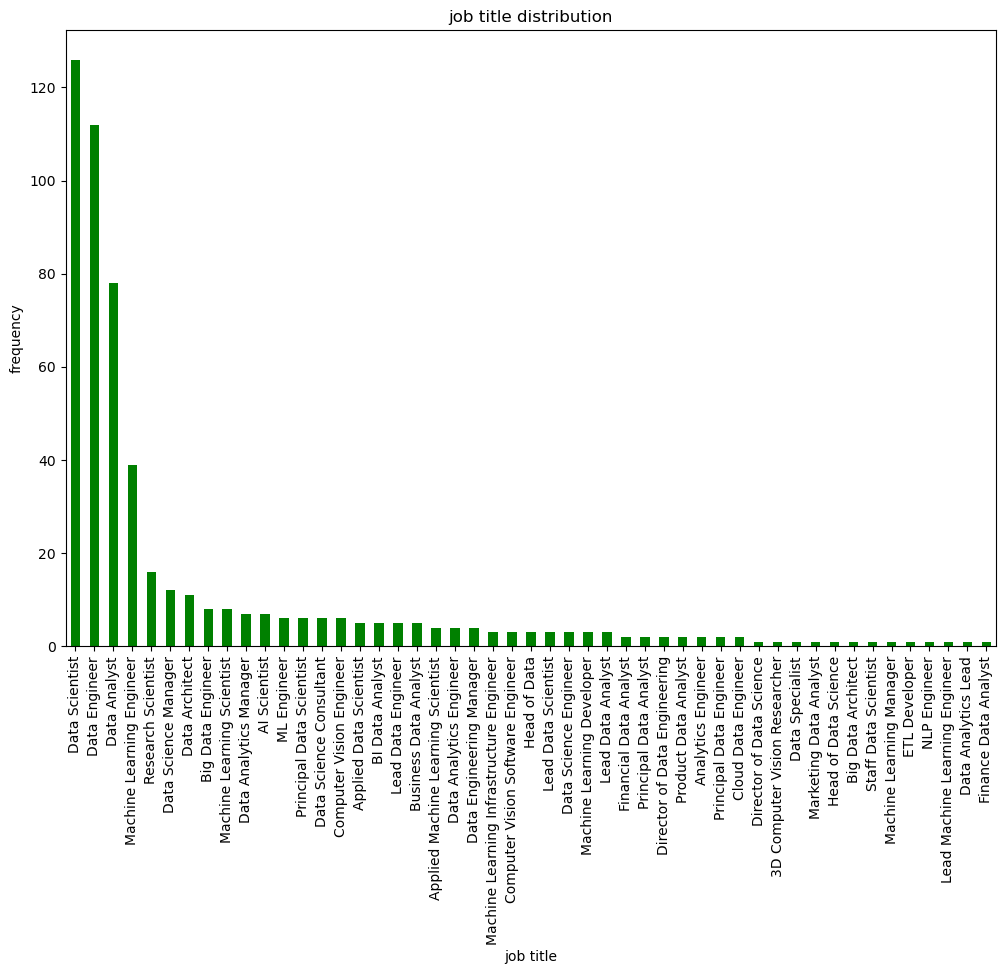

In [20]:

plt.figure(figsize=(12,8))
data["job_title"].value_counts().plot(kind="bar",color="green")
plt.title("job title distribution")
plt.xlabel("job title")
plt.ylabel("frequency")
plt.xticks(rotation=90)
plt.show()

# correlation analysis

correlation matrix


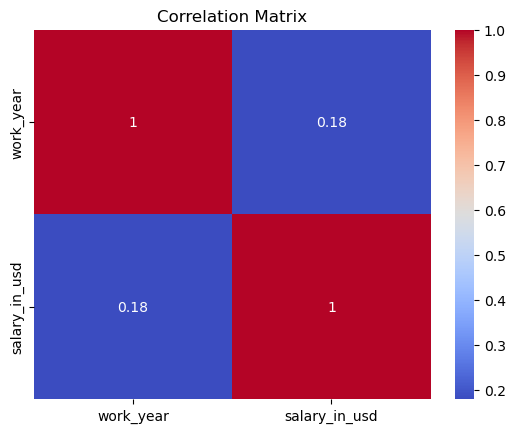

In [19]:
print("correlation matrix")
correlation_matrix=data.corr()
sb.heatmap(correlation_matrix,annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# salary analysis

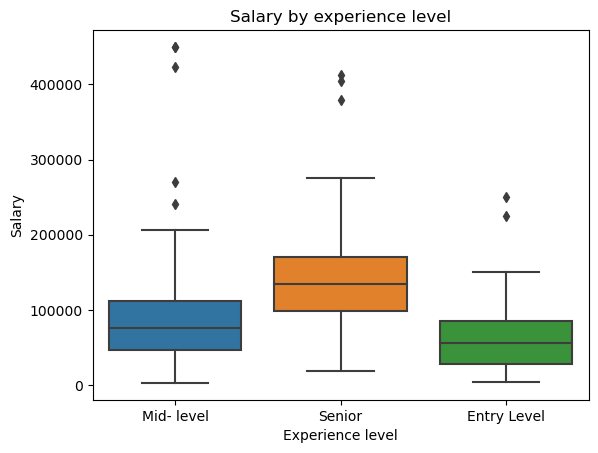

In [25]:
sb.boxplot(x="experience_level",y="salary_in_usd",data=data)
plt.title("Salary by experience level")
plt.xlabel("Experience level")
plt.ylabel("Salary")
plt.show()

# salary by job title

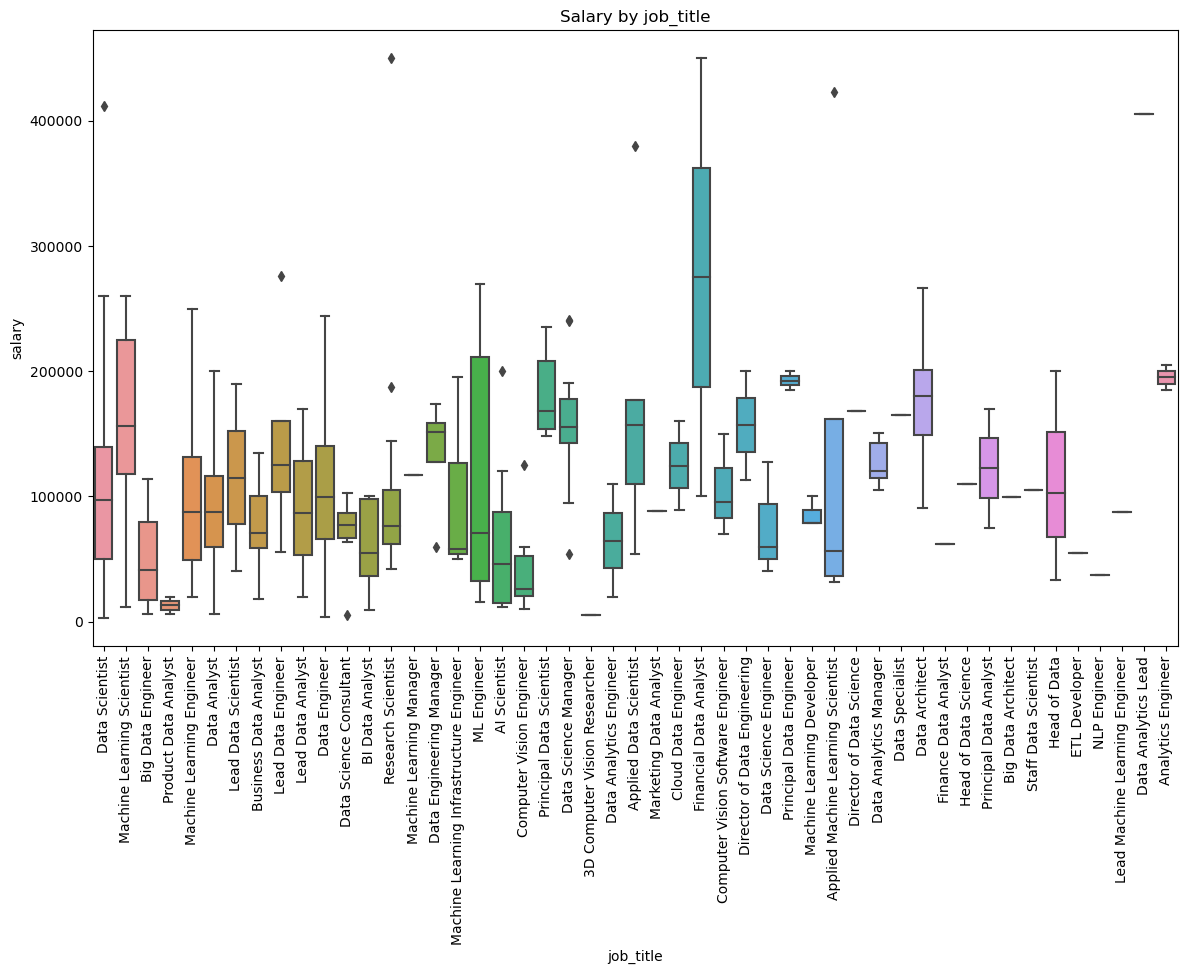

In [31]:
plt.figure(figsize=(14,8))
sb.boxplot(x="job_title",y="salary_in_usd",data=data)

plt.title("Salary by job_title")

plt.xlabel("job_title")
plt.ylabel("salary")
plt.xticks(rotation=90)
plt.show()

# employment type analysis

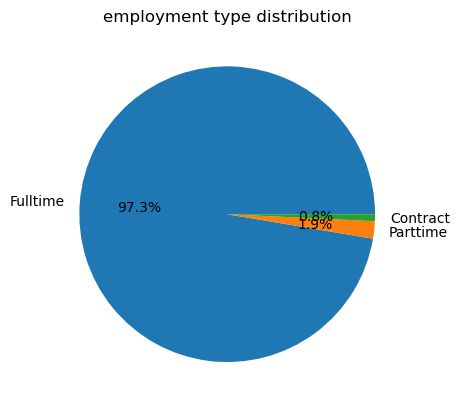

In [37]:
data["employment_type"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.title("employment type distribution")
plt.ylabel(" ")
plt.show()

# company location analysis

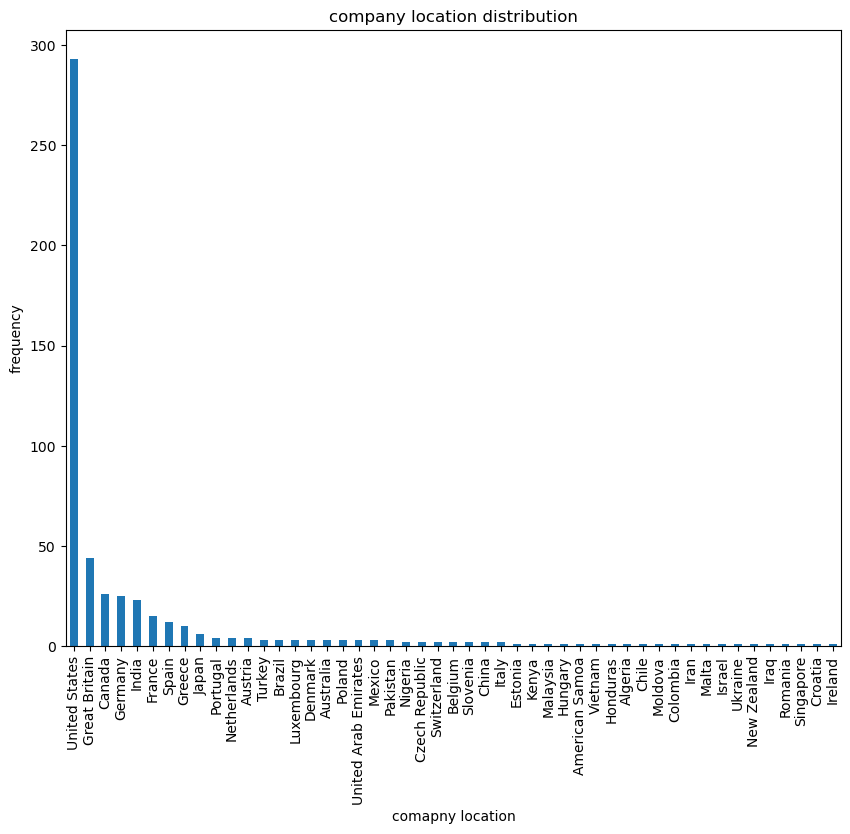

In [42]:
plt.figure(figsize=(10,8))
data["company_location"].value_counts().plot(kind="bar")

plt.title("company location distribution")
plt.xlabel("comapny location")
plt.ylabel("frequency")
plt.xticks(rotation=90)
plt.show()

# regression analysis

In [54]:

label_encoders = {}
categorical_columns = ['experience_level', 'employment_type', 'company_size']

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


X = data[['work_year', 'experience_level', 'employment_type', 'company_size']]
y = data['salary_in_usd']


model = LinearRegression()
model.fit(X, y)


print("Regression Coefficients:", model.coef_)

Regression Coefficients: [  6188.96693745  37171.86787935 -32308.7480333  -11918.96734828]
